In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter

In [14]:
#reading data
dataset=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [15]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [16]:
dataset.shape

(299, 13)

In [17]:
#splitting data
x=dataset.iloc[:, 0:-1].values
y=dataset.iloc[:, -1].values


In [18]:
x

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [19]:
#spliting data in train and test
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=1000)
print("shape of x_train =",x_train.shape)
print("shape of y_train =",y_train.shape)
print("shape of x_test =",x_test.shape)
print("shape of y_test =",y_test.shape)

shape of x_train = (239, 12)
shape of y_train = (239,)
shape of x_test = (60, 12)
shape of y_test = (60,)


In [20]:
#k_nearest_neighbor algorithm and fitting data
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [21]:
#checking accuracy
model.score(x_test,y_test)

0.7333333333333333

In [22]:
#prediction from test data
pred=model.predict(x_test)

In [23]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        43
           1       0.56      0.29      0.38        17

    accuracy                           0.73        60
   macro avg       0.66      0.60      0.61        60
weighted avg       0.71      0.73      0.70        60



In [25]:
confusion_matrix(y_test,pred)

array([[39,  4],
       [12,  5]])

In [26]:
Counter(y_test)

Counter({1: 17, 0: 43})

/home/mukesh/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


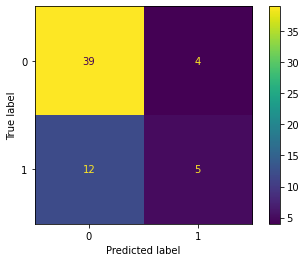

In [27]:
plot_confusion_matrix(model,x_test,y_test)